# Маркетинговый анализ приложения  

## Цель исследования 

- откуда приходят пользователи и какими устройствами они пользуются,

- сколько стоит привлечение пользователей из различных рекламных каналов;

- сколько денег приносит каждый клиент,

- когда расходы на привлечение клиента окупаются,

- какие факторы мешают привлечению клиентов.

## Этапы

Для начала необходимо загрузить данные о визитах, заказах и расходах. После чего нужно проверить данные на наличие каких-либо ошибок и провести предобработку. 
После предобраюотки можно приступать к исследовательскому и маркетинговому анализу.
    
    Исходя из этого проект состоит из следующих этапов:
    
- Загрузка данных

- Проверка данных и прелобработка

- Исследовательский анализ

- Маркетинговый анализ

- Формирование общего вывода

## Описание данных

 Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
 
Структура visits_info_short.csv:

User Id — уникальный идентификатор пользователя,

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.

Структура costs_info_short.csv:

dt — дата проведения рекламной кампании,

Channel — идентификатор рекламного источника,

costs — расходы на эту кампанию.

##  Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### Загрузка данных

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')

In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')

### Предобработка данных

In [5]:
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
visits.duplicated().sum()

0

In [8]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [9]:
visits = visits.rename(columns=lambda x: x.lower())

In [10]:
visits = visits.rename(
    columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'}
)

In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [14]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [16]:
orders = orders.rename(columns=lambda x: x.lower())

In [17]:
orders = orders.rename(
    columns={'user id': 'user_id', 'event dt': 'event_dt'}
)

In [18]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [19]:
orders.duplicated().sum()

0

In [20]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [21]:
costs = costs.rename(columns={'Channel': 'channel'})

In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [23]:
costs.duplicated().sum()

0

In [24]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [25]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [26]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [27]:
costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Вывод: После ознакомления с данными, были обнаружены некоторые проблемы, которые необходимо было решить, в рамках предобработки данных, для дальнейшего исследования.

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функция для профилей :

In [28]:
def get_profiles(visits, orders, costs):
    # параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {'session_start': 'first',
             'channel': 'first',
             'device': 'first',
             'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # определим дату первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month
    
    # признак оплаты
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acq_cost (CAC)
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    costs['acq_cost'] = costs['costs'] / costs['unique_users']
    
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acq_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    profiles['acq_cost'] = profiles['acq_cost'].fillna(0)
    
    return profiles

Функция для удержания:

In [29]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для конверсии:

In [30]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для метрики LTV:

In [31]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acq_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acq_cost': 'mean'})
            .rename(columns={'acq_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Фукция для филтрации с помощью скользящего среднего:

In [32]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации удержания:

In [33]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'
    )
    
    plt.tight_layout()
    plt.show() 

Функция для визуализации конверсии:

In [34]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей')

    plt.tight_layout()
    plt.show() 

Функция для визуализации LTV:

In [35]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей')

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей')

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей

In [36]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acq_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,9,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,10,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,7,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,9,False,0.205714


### Даты привлечения

In [37]:
min_date = min(profiles['dt'])
max_date = max(profiles['dt'])
print('Минимальная дата привлечения:', min_date)
print('Максимальная дата привлечения:', max_date)

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


Вывод : Самая ранняя дата привлечения, когда приходили пользователи - 1 мая 2019г. 
Самая поздняя дата - 27 октрября 2019г.

### Разбиение по странам

In [38]:
region_paying = profiles.groupby('region').agg(total_users=('user_id', 'size'), paying_users=('payer', 'sum'))
region_paying['paying, %'] = region_paying['paying_users'] / region_paying['total_users'] * 100

region_paying

,total_users,paying_users,"paying, %"
region,,,
France,17450,663,3.799427
Germany,14981,616,4.111875
UK,17575,700,3.982930
United States,100002,6902,6.901862


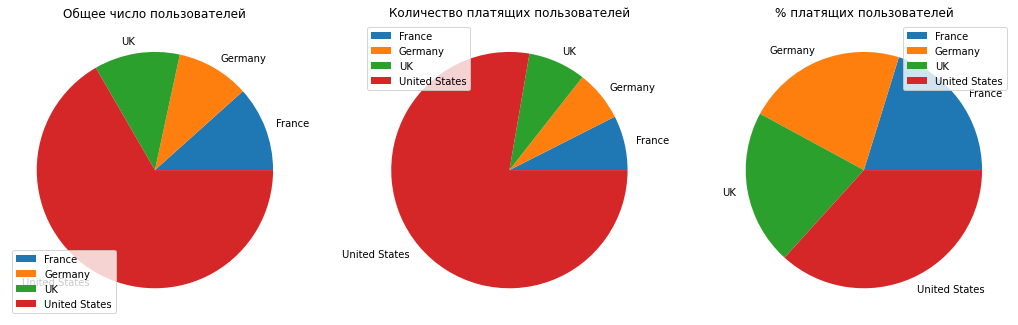

In [39]:
region_paying.plot(kind='pie', subplots=True, figsize=(18, 6), xlabel=None)

# Переименование подписей графиков
labels = ['Общее число пользователей', 'Количество платящих пользователей', '% платящих пользователей']

# Изменение подписей графиков
for i, label in enumerate(labels):
    ax = plt.gcf().axes[i]
    ax.set_title(label)
    ax.set_ylabel('')

plt.show()

Вывод : Из таблицы и графиков видно, что большее число пользователей из США, количество платящих пользователей таким же образом из США. Самый большой процент платящих пользователей находится в США.

### Разбиение по девайсам

In [40]:
device_paying = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'sum'})
device_paying['paying, %'] = (device_paying['payer'] / device_paying['user_id'] * 100).round(2)
device_paying

,user_id,payer,"paying, %"
device,,,
Android,35032,2050,5.85
Mac,30042,1912,6.36
PC,30455,1537,5.05
iPhone,54479,3382,6.21


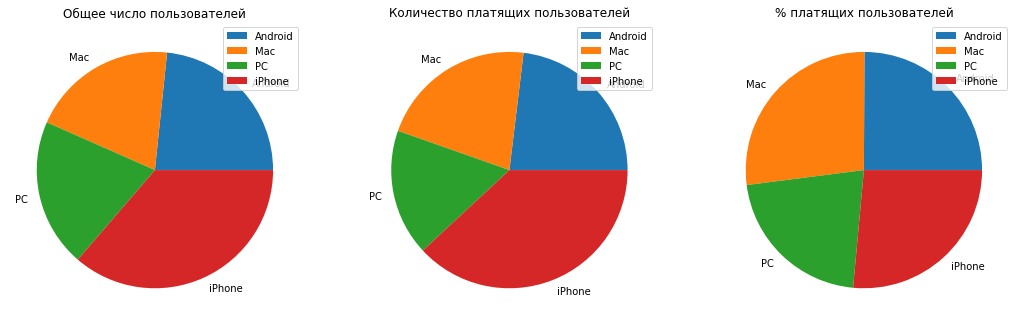

In [41]:
device_paying.plot(kind='pie', subplots=True, figsize=(18, 6), xlabel=None, labeldistance=1.1)
labels1 = ['Общее число пользователей', 'Количество платящих пользователей', '% платящих пользователей']

for i, label in enumerate(labels1):
    ax=plt.gcf().axes[i]
    ax.set_title(label)
    ax.set_ylabel('')
plt.subplots_adjust(top=1)
plt.show()

Вывод: Исходя из полученных данных, большинство пользоваетелй используют Iphone. Платящие пользователи так же используют Iphone. Однако процент платящих пользователей, которые используют Mac несколько выше, чем у Iphone

### Разбиение по каналам

In [42]:
channel_paying = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'sum'})
channel_paying['%, paying'] = channel_paying['payer'] / channel_paying['user_id'] * 100
channel_paying.sort_values(by='%, paying', ascending=False)

,user_id,payer,"%, paying"
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


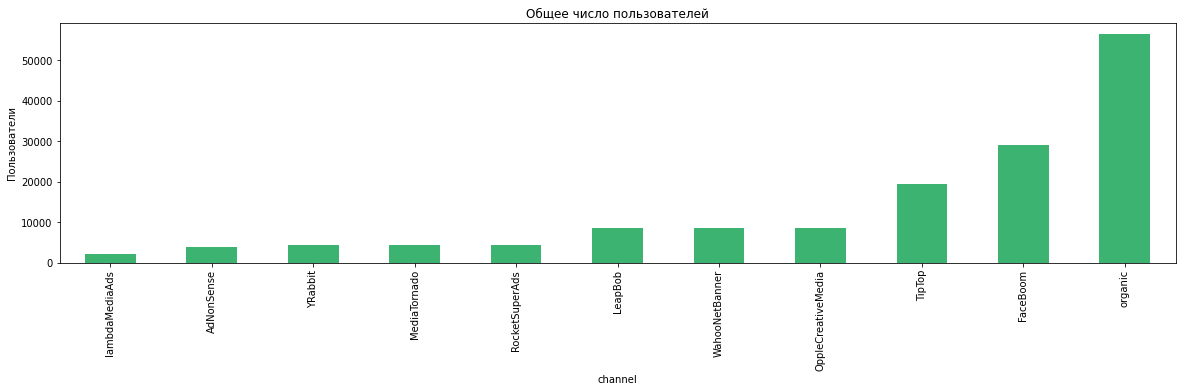

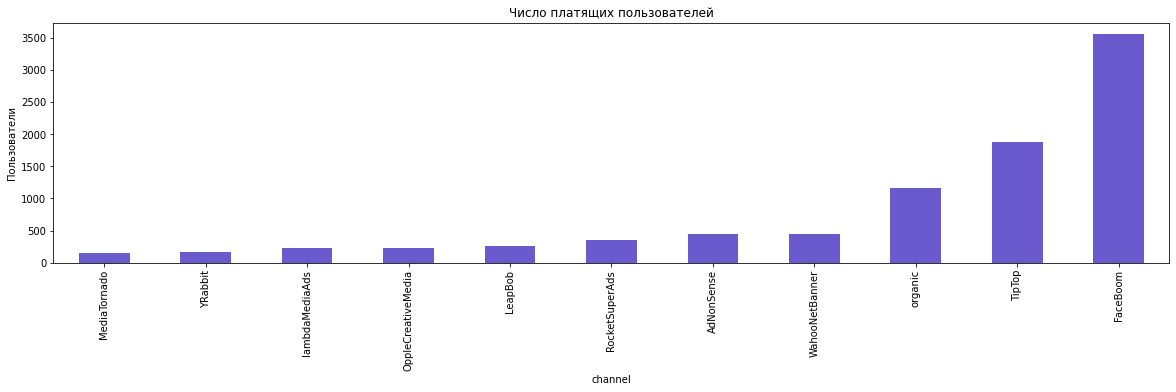

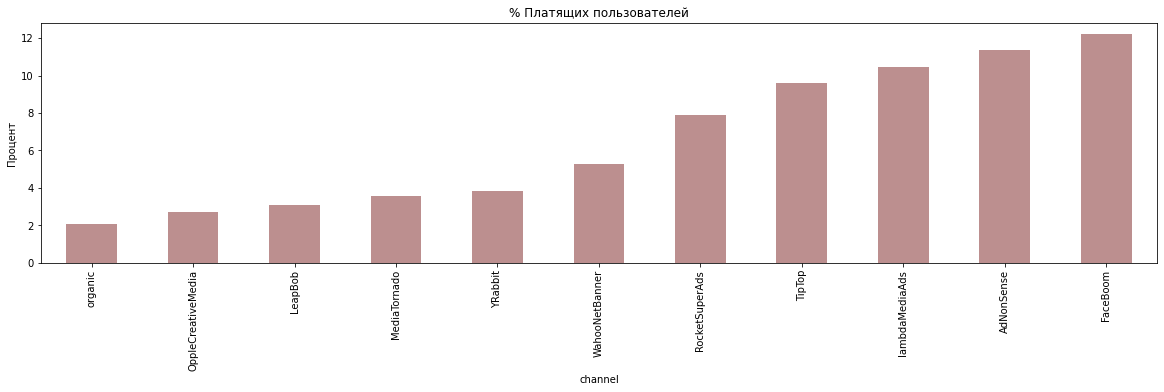

In [43]:
channel_paying['user_id'].sort_values(ascending=True).plot(
    kind='bar', ax=plt.subplot(3, 1, 1), figsize=(20, 15), color='mediumseagreen');
plt.title('Общее число пользователей')
plt.ylabel('Пользователи')
plt.show()

channel_paying['payer'].sort_values(ascending=True).plot(
    kind='bar', ax=plt.subplot(3, 1, 2), figsize=(20, 15), color='slateblue');
plt.title('Число платящих пользователей')
plt.ylabel('Пользователи')
plt.show()

channel_paying['%, paying'].sort_values(ascending=True).plot(
    kind='bar', ax=plt.subplot(3, 1, 3), figsize=(20, 15), color='rosybrown');
plt.title('% Платящих пользователей')
plt.ylabel('Процент')
plt.show()

 Вывод: Если не считать органических пользователей, то самое большое число платящих пользователей приходяи из FaceBoom. Процент платящих пользователей так же самый высокий из FaceBoom.

Итог: Можно сделать вывод, что большинство платящих пользователей из США и пользуются продукцией Apple (Iphone и Mac). 
Так же большинство платящих пользователей приходят из канала FaceBoom.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Общая сумма расходов на маркетинг

In [44]:
total_cost = costs['costs'].sum().round(1)
print('Общая сумма расходов на маркетинг:', total_cost)

Общая сумма расходов на маркетинг: 105497.3


### Распределение трат на каналы

In [45]:
costs_per_channel = costs.groupby('channel').agg('sum').sort_values(by='costs', ascending=False)
costs_per_channel

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Вывод: Исходя из данных видно, что бльшинство денег было потрачено на канал TipTop.

### Динамика изменения расходо по месяцам и неделям

In [46]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


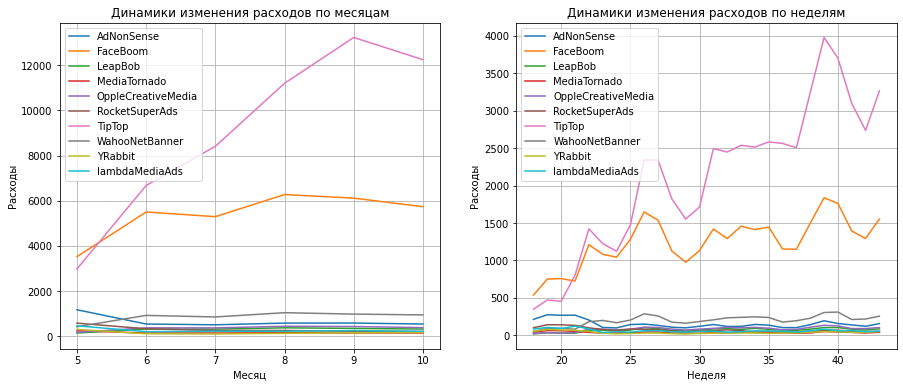

In [47]:
plt.figure(figsize=(15, 6))

ax1 = plt.subplot(1, 2, 1)
costs1 = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(
grid=True, ax=ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.title('Динамики изменения расходов по месяцам')

ax2 = plt.subplot(1, 2, 2)
costs1 = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(
grid=True, ax=ax2)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.title('Динамики изменения расходов по неделям')

plt.show()

Вывод: Из графиков видно, показатели роста расходов растут у каналов TipTop и FaceBoom. Однако TipTop показывает рост как на мсячном промежутке, так и на недельном.

In [48]:
project_mean = profiles['acq_cost'].mean()
project_mean.round(6)

0.703278

Вывод: Средний CAC составляет 0.7

In [49]:
mean_cost = profiles.groupby('channel').agg({'acq_cost': 'mean'}).sort_values(by='acq_cost', ascending=False)

In [50]:
mean_cost

,acq_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Вывод: Самые дорогое привлечение у канала TipTop.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [51]:
profiles1 = profiles.query('channel != "organic"')

In [52]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles1, orders, datetime(2019, 11, 1).date(), 14)


In [53]:
ltv_raw

,user_id,first_ts,channel,device,region,dt,month,payer,acq_cost,event_dt,revenue,lifetime,cohort
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,2019-05-07 20:59:09,4.99,0.0,All users
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,2019-05-08 06:01:28,4.99,0.0,All users
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,2019-05-09 07:34:01,4.99,1.0,All users
3,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,NaT,NaN,NaN,All users
4,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235,NaT,NaN,NaN,All users
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112157,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,5,False,1.900000,NaT,NaN,NaN,All users
112158,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,8,False,1.117838,NaT,NaN,NaN,All users
112159,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,9,False,3.500000,NaT,NaN,NaN,All users
112160,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,7,False,2.600000,NaT,NaN,NaN,All users


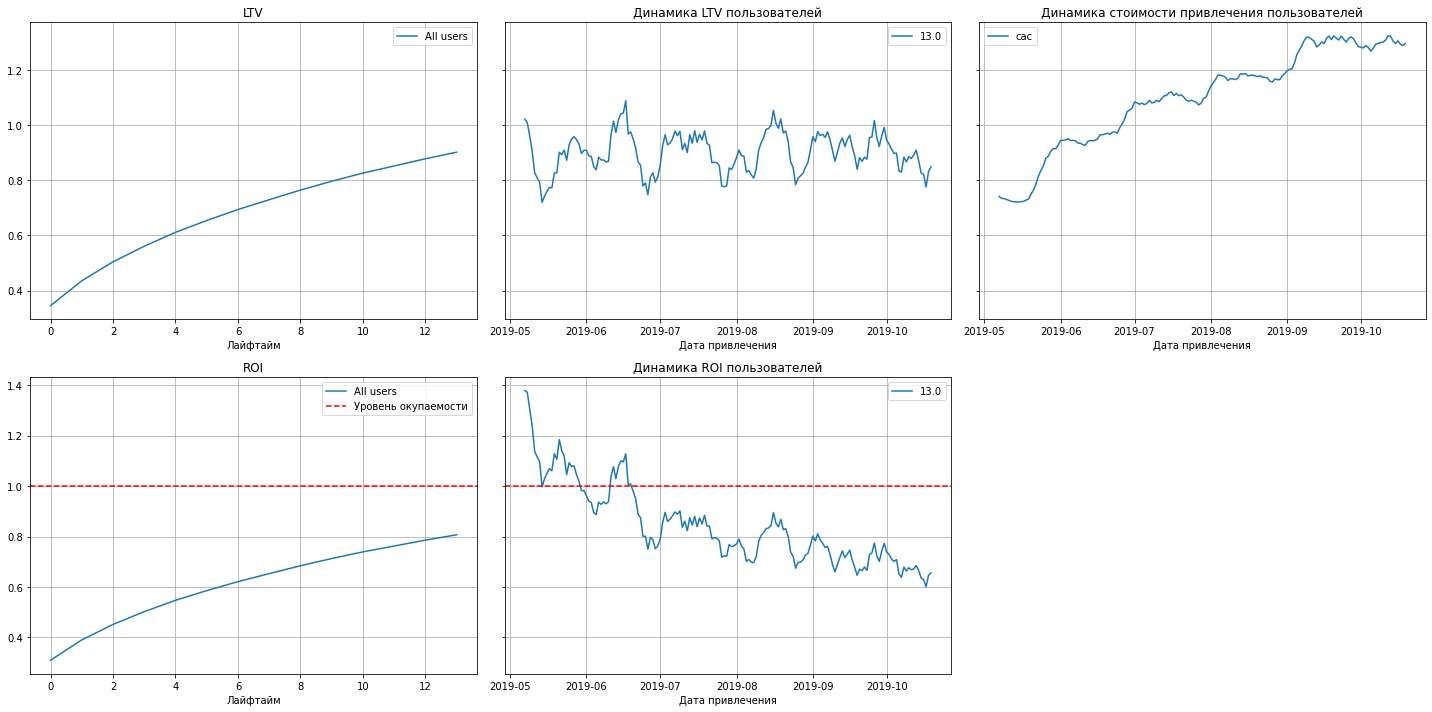

In [54]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon=14)

Вывод: Из графиков видно, что динамик LTV медленно идет на спад, пиковое значениединамики LTV находилось между июнем и июлем. Стоимость привлечения наоборот стремительно растет. Показатели ROI не достигают показателя окупаемости. Реклама не окупается полностью. Стоит отметить, что динамика показателя ROI стремительно падает.

In [55]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles1, orders, datetime(2019, 11, 1).date(), 14
)

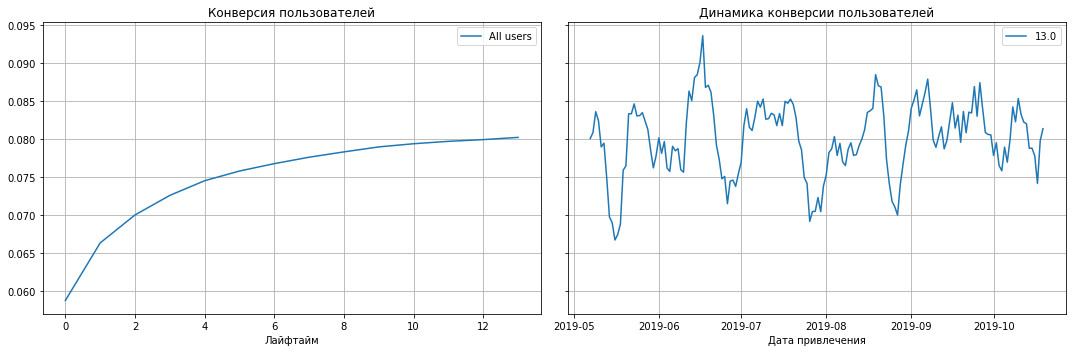

In [56]:
plot_conversion(conversion, conversion_history, 14)

Вывод: Конверсия пользователей впорядке. Пиковый позакатель динамики конверсии находится между июнем и июлем. Стоит отметить, что начало и конец графика динамики находятся почти на одном уровне.

In [57]:
conversion_raw_region, conversion_region, conversion_history_region = get_conversion(
    profiles1, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

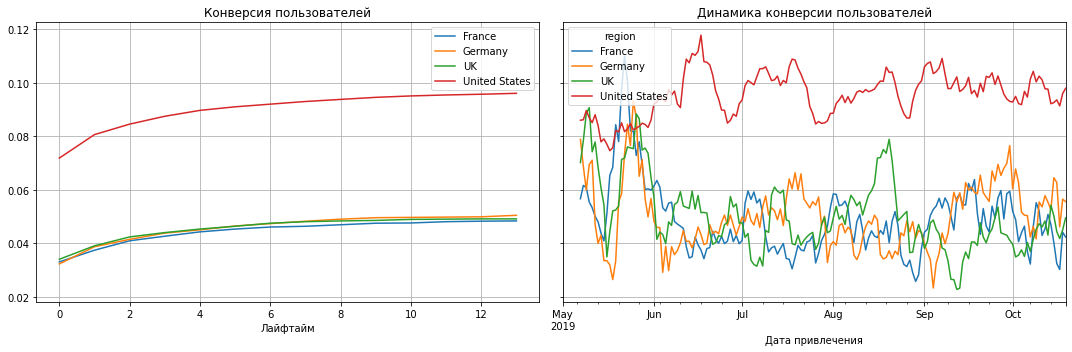

In [58]:
plot_conversion(conversion_region, conversion_history_region, 14)

Вывод: На графиках конверсии и динамики лидирует США. Показатели графика намного выше, чем у остальных стран.

In [59]:
conversion_raw_device, conversion_device, conversion_history_device = get_conversion(
    profiles1, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

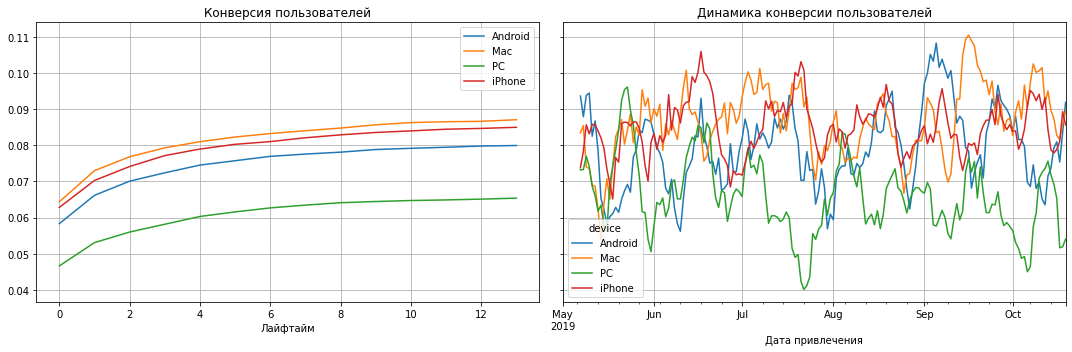

In [60]:
plot_conversion(conversion_device, conversion_history_device, 14)

Вывод: Самые выоские показатели конверсии пользователй у Mac и Iohone. Самая высокая динамика у Android и Iphone.

In [61]:
conversion_raw_channel, conversion_channel, conversion_history_channel = get_conversion(
    profiles1, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

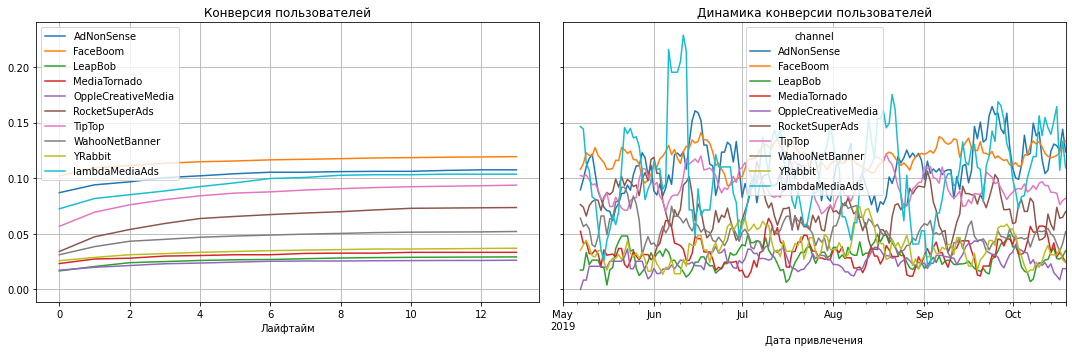

In [62]:
plot_conversion(conversion_channel, conversion_history_channel, 14)

Вывод: Их графиков можно выделить лучшие показатели каналов FaceBoom, AdNonSense, lambdaMediaAds.

In [63]:
retention_raw, retention, retention_history = get_retention(
    profiles1, visits, datetime(2019, 11, 1).date(), 14
)

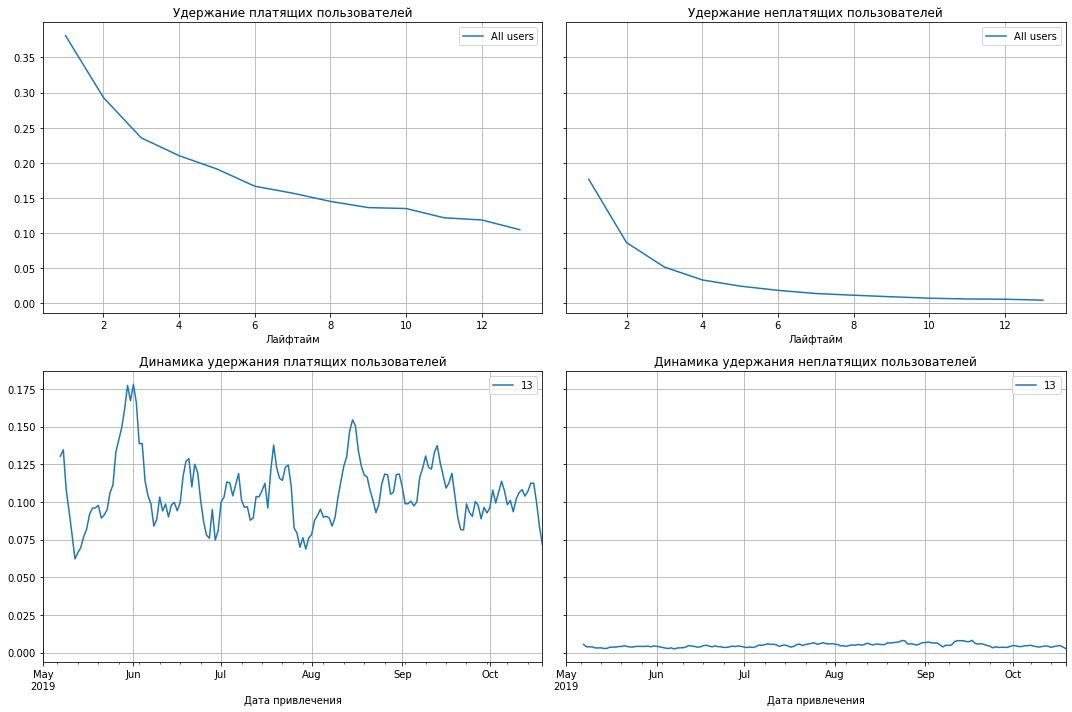

In [64]:
plot_retention(retention, retention_history, 14)

Вывод: Показатели удержания платящих пользователей стремительно падают. Динамика тоже имеет потенциал спада.

In [65]:
retention_raw_region, retention_region, retention_history_region = get_retention(
    profiles1, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

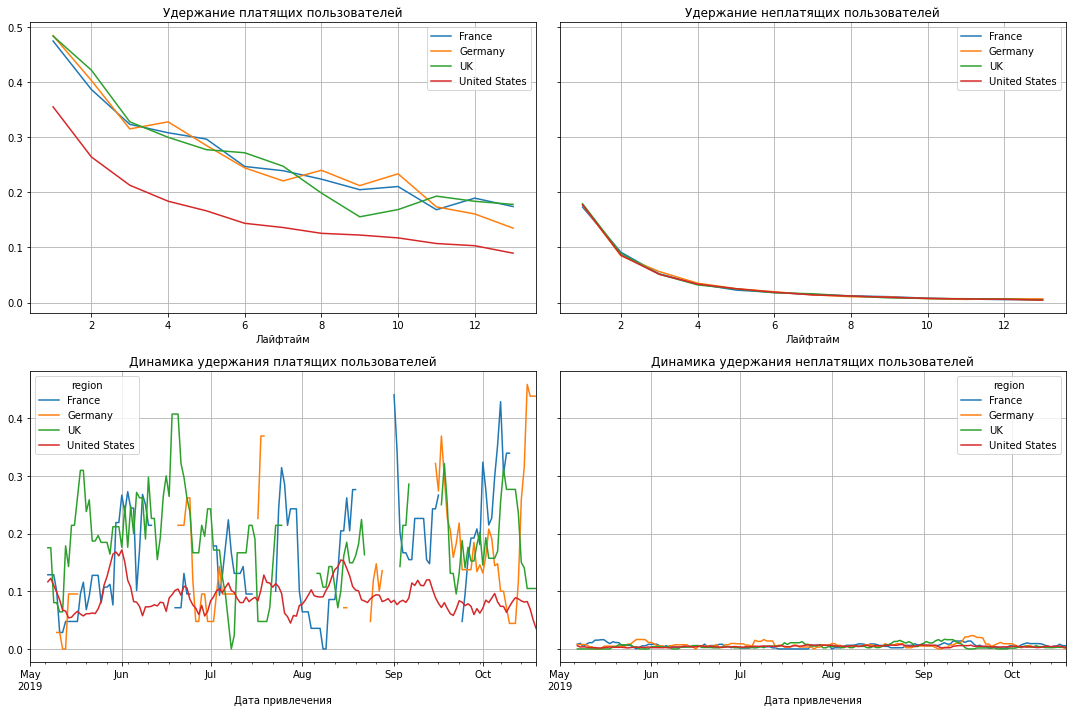

In [66]:
plot_retention(retention_region, retention_history_region, 14)

Вывод : из графиков удержания по странам платящих пользователей видно, что показатель США оказывается нижу всех. На это есть много причин - пользовательский опыт, конкуренция, некачественный трафик. Самая высокая динамика удержания платящих пользователей у Германии.

In [67]:
retention_raw_device, retention_device, retention_history_device = get_retention(
    profiles1, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

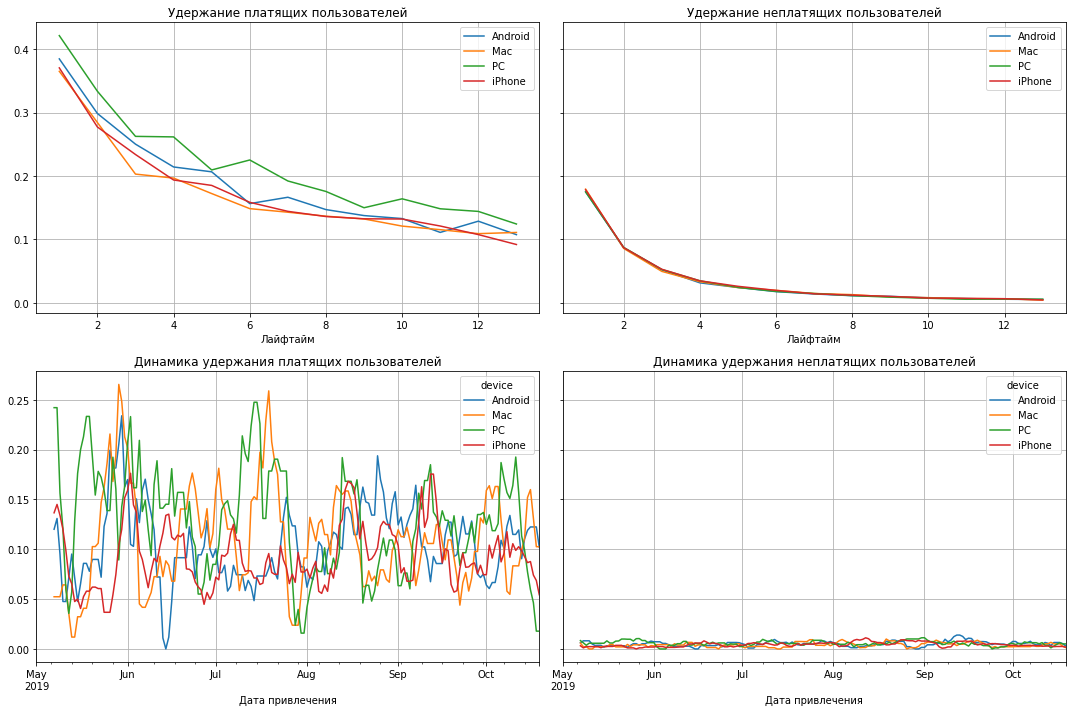

In [68]:
plot_retention(retention_device, retention_history_device, 14)

Вывод: Показатели удержания у PC несколько выше, чем у остальных. Показатели динамики самые высокие Mac.

In [69]:
retention_raw_channel, retention_channel, retention_history_channel = get_retention(
    profiles1, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

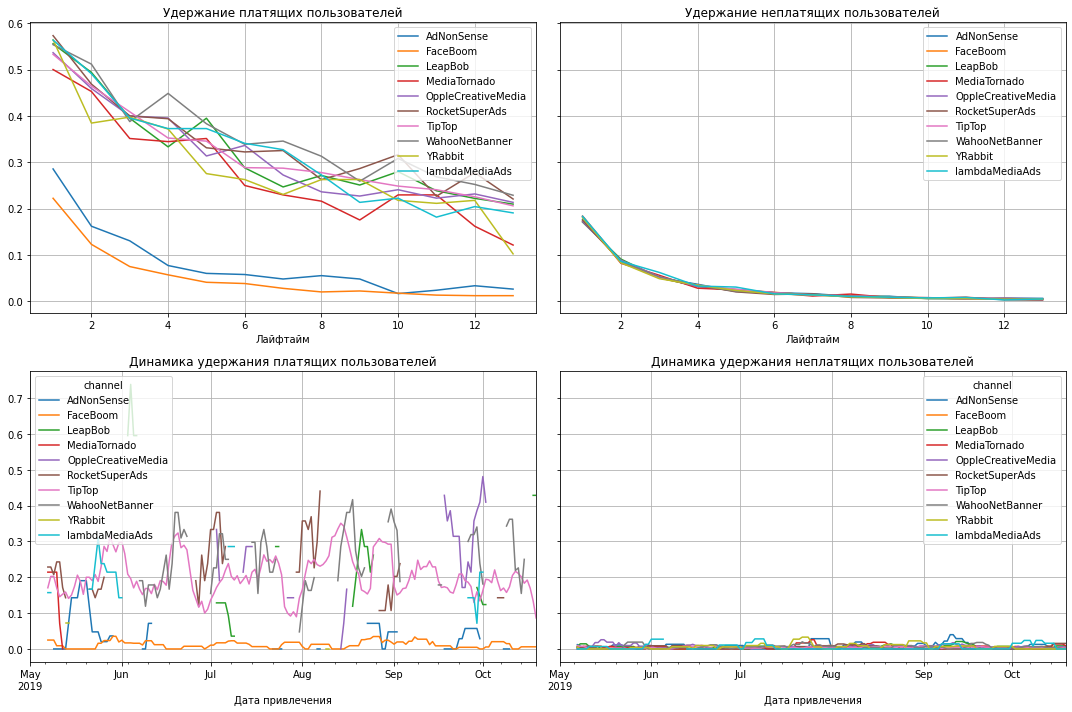

In [70]:
plot_retention(retention_channel, retention_history_channel, 14)

Вывод: Самые высокие показатели удержания платящих пользователей имеют каналы WahooNetBanner и RocketSuperAds. FaceBoom же имеет самые низкие показатели. Стоит отметить, что самая продолжительная динамика у канала TipTop, а самые высокие показатели у LeapBob и OppleCreativeMedia.

In [71]:
ltv_raw_device, ltv_device, ltv_history_device, roi_device, roi_history_device = get_ltv(
    profiles1, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])


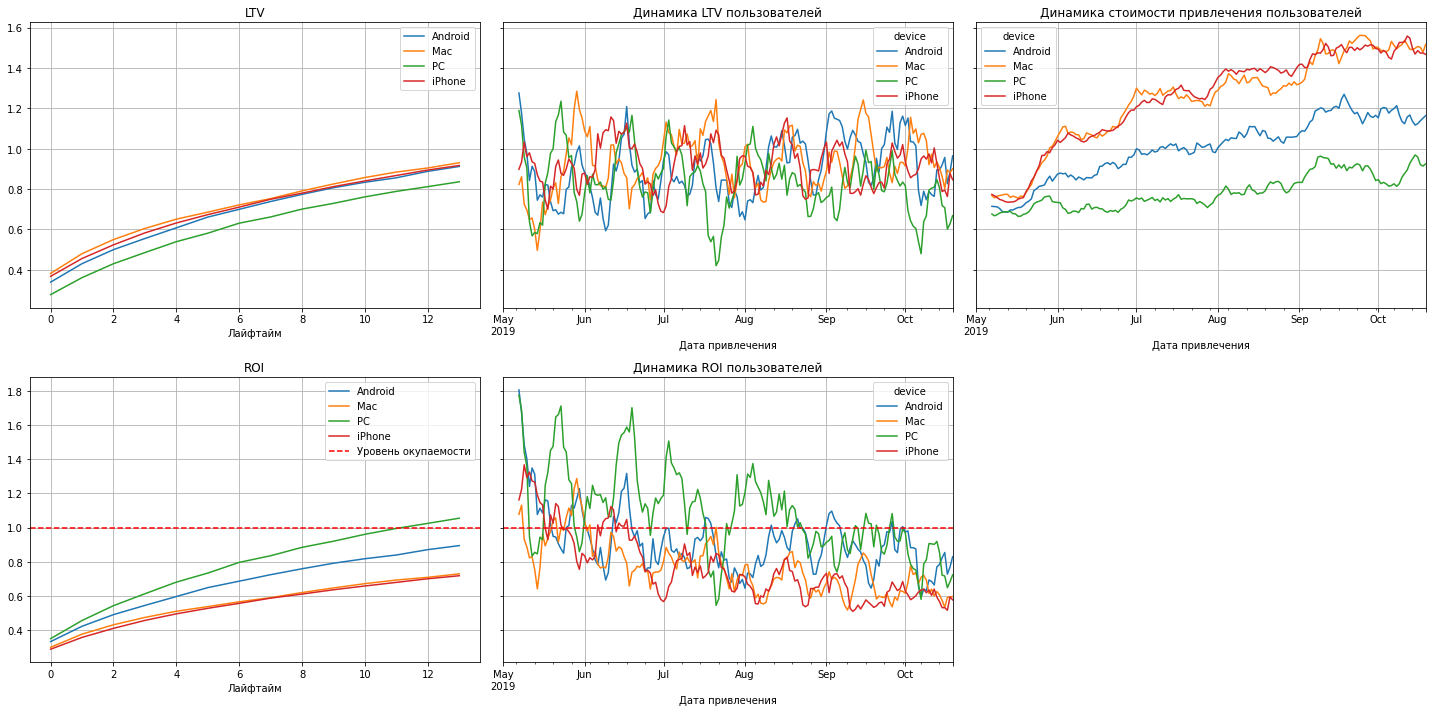

In [72]:
plot_ltv_roi(ltv_device, ltv_history_device, roi_device, roi_history_device, 14)

Вывод: Невзирая на то, что большинство пользователей импользуют Iphone, окупаются только PC.
Возмоно, что присутсвуют технические трудности со смартфонами и Mac. 

In [73]:
ltw_raw_region, ltv_region, ltv_history_region, roi_region, roi_history_region = get_ltv(
    profiles1, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']

)

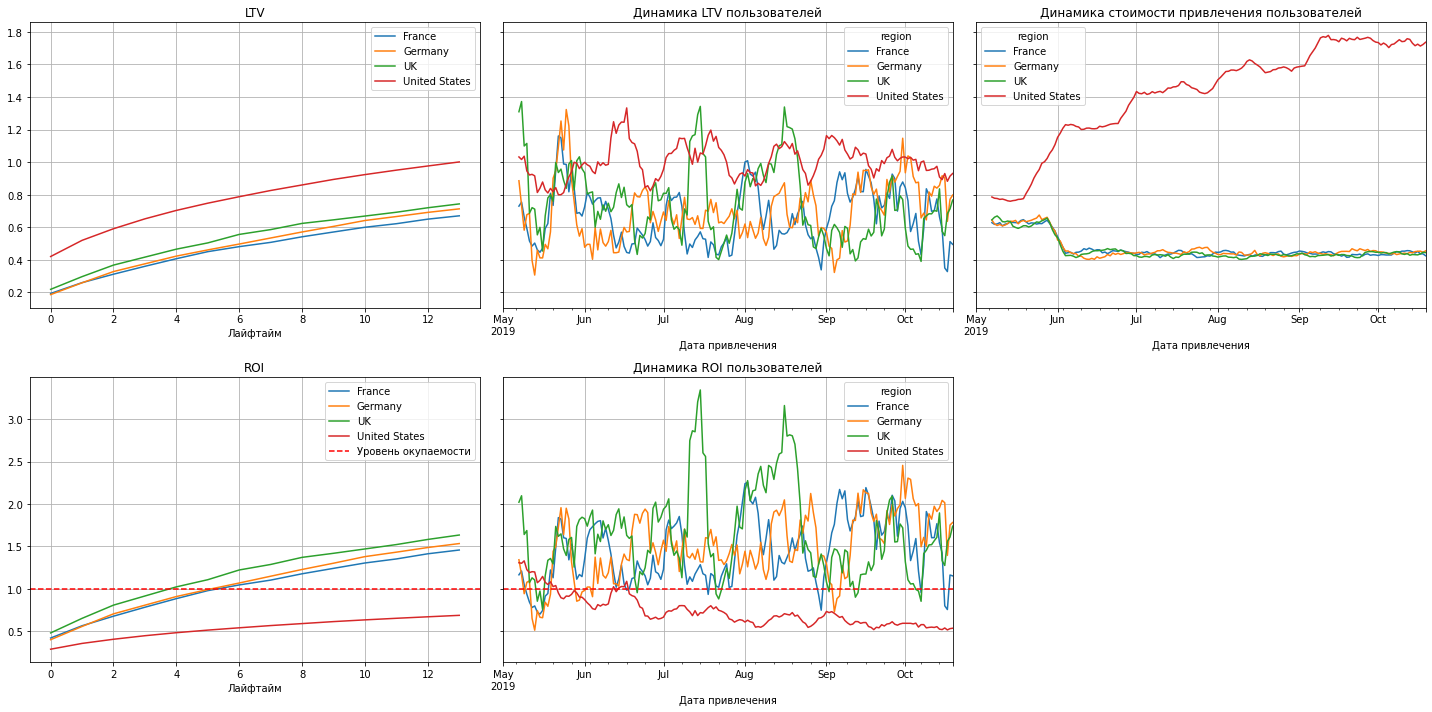

In [74]:
plot_ltv_roi(ltv_region, ltv_history_region, roi_region, roi_history_region, 14)

Вывод: Стоит отметить динамику стоимости привлечения пользователей - США имеет показатель гораздо выше остальных стран. Учитывая, что большинство пользователей находтся в США, только показатели ROI этой страны не доходят до уровня окупаемости. Динамика ROI так же имеет спад только у США. 

In [75]:
ltw_raw_channel, ltv_channel, ltv_history_channel, roi_channel, roi_history_channel = get_ltv(
    profiles1, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']

)

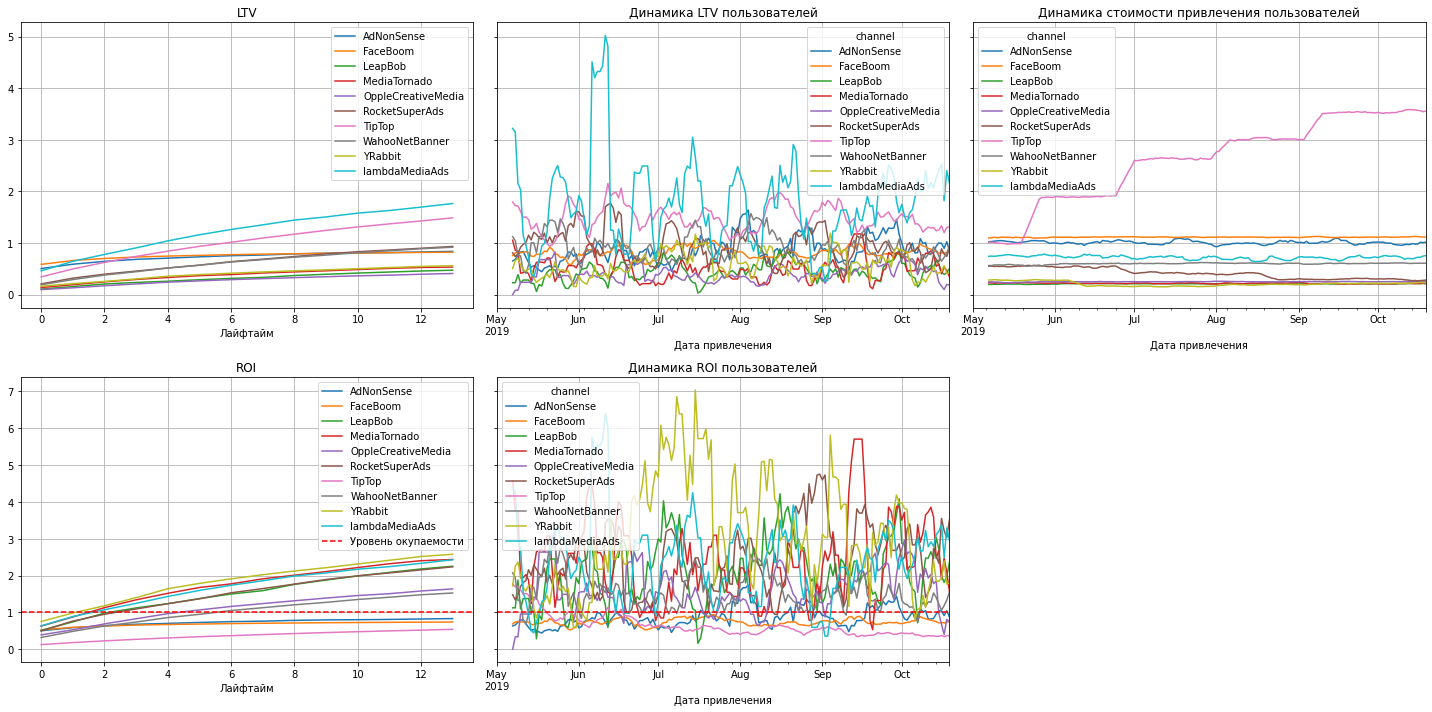

In [76]:
plot_ltv_roi(ltv_channel, ltv_history_channel, roi_channel, roi_history_channel, 14)

Вывод: Большинство денег было инвестированно в источник TipTop, однако показатель ROI у данного источника не достиг уровня окупаемости. FaceBoom имеет так же много пользователй, но окупаемость так же не достигнута.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Вывод :
Возможные причины неэффективности привлечения пользователей :
- Возможные проблемы с оплатой или использованеим. Показатели удержания падают по всем секторам, однако конверсия находится на приемлемых показателях, особенно у пользователей из США.


Рекомендации для отдела маркетинга:

В результате исследования были установлены два канала с большим количеством пришедших пользователей - TipTop и FaceBoom. Оба этих канала не достигли уровня окупаемости. Стоимость привлечения этих каналов горазд выше нежели прибыль с пользователя. Невзирая на продолжительное удержание платящих пользователей у каналаа TipTop, стоит пересмотреть условия рекламы с этим каналом.

Стоит обратить больше внимание на каналы, которые имеют как неплохие показатели окупаемости, так и динамику удержания -  WahooNetBanner, lambdaMediaAds. Данные каналы имеют более низкие показатели общего числа платящих пользователей, однако показатели окупаемости и удержания у них гораздо выше, чем у TipTop и FaceBoom.
